In [2]:
'''
Decision Tree: Decision tree is a tree shaped diagram used to determine a course of action. Each branch of  the tree represents 
a possible decision.

Decision tree is used for classification as well as for regression problems.

Entropy: Degree of Randomness.
Entropy is  the measure of randomness or unpredicatability in the dataset.

Information gain: It is the measure of decrease in entropy after the dataset is split.

Goal is to  reduce the entropy and increase the information gain in each split.

Whenever you are working with Tree based algorithm then there is NO NEED OF DATA PREPROCESSING (Normalization and Encoding) You have check NaN
'''

'\nDecision Tree: Decision tree is a tree shaped diagram used to determine a course of action. Each branch of  the tree represents \na possible decision.\n\nDecision tree is used for classification as well as for regression problems.\n\nEntropy: Degree of Randomness.\nEntropy is  the measure of randomness or unpredicatability in the dataset.\n\nInformation gain: It is the measure of decrease in entropy after the dataset is split.\n\nGoal is to  reduce the entropy and increase the information gain in each split.\n\nWhenever you are working with Tree based algorithm then there is NO NEED OF DATA PREPROCESSING (Normalization and Encoding) You have check NaN\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree

In [4]:
balance_data = pd.read_csv(r"C:\Users\Lenovo\Muskan\Ml\Machine-Learning-Projects\Decision Tree\Loan_Classification\loan_data.csv")

In [5]:
balance_data.head()

,Unnamed: 0,Initial payment,Last payment,Credit Score,House Number,Result
0,0,201,10018,250,3046,yes
1,1,205,10016,395,3044,yes
2,2,257,10129,109,3251,yes
3,3,246,10064,324,3137,yes
4,4,117,10115,496,3094,yes


In [6]:
balance_data.shape

(1000, 6)

In [7]:
print ("Dataset Lenght:: "), len(balance_data)
print ("Dataset Shape:: "), balance_data.shape

Dataset Lenght:: 
Dataset Shape:: 


(None, (1000, 6))

In [8]:
print ("Dataset:: ")
balance_data.head()

Dataset:: 


,Unnamed: 0,Initial payment,Last payment,Credit Score,House Number,Result
0,0,201,10018,250,3046,yes
1,1,205,10016,395,3044,yes
2,2,257,10129,109,3251,yes
3,3,246,10064,324,3137,yes
4,4,117,10115,496,3094,yes


In [9]:
# yes: 1
# No: 0

In [10]:
balance_data.drop(columns=['Unnamed: 0',"House Number"] , inplace=True)

In [11]:
balance_data.head()

,Initial payment,Last payment,Credit Score,Result
0,201,10018,250,yes
1,205,10016,395,yes
2,257,10129,109,yes
3,246,10064,324,yes
4,117,10115,496,yes


In [12]:
balance_data['Result'].value_counts()

#P(y)=479/1000
#P(n)=521/1000

Result
No     521
yes    479
Name: count, dtype: int64

In [13]:
balance_data.head()

,Initial payment,Last payment,Credit Score,Result
0,201,10018,250,yes
1,205,10016,395,yes
2,257,10129,109,yes
3,246,10064,324,yes
4,117,10115,496,yes


In [14]:
balance_data.isna().sum()

Initial payment    0
Last payment       0
Credit Score       0
Result             0
dtype: int64

In [15]:
X = balance_data[["Initial payment", "Last payment","Credit Score"]].values
Y = balance_data["Result"].values

In [16]:
X

array([[  201, 10018,   250],
       [  205, 10016,   395],
       [  257, 10129,   109],
       ...,
       [  316, 14872,   613],
       [  305, 14926,   897],
       [  168, 14798,   834]], dtype=int64)

In [17]:
Y[:10]

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes'], dtype=object)

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)

In [62]:
# post prunning using max depth to increase accuracy of testing data results
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)

#training the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [63]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 12402.50
|   |--- feature_1 <= 12052.50
|   |   |--- feature_1 <= 11548.50
|   |   |   |--- feature_0 <= 472.00
|   |   |   |   |--- class: yes
|   |   |   |--- feature_0 >  472.00
|   |   |   |   |--- class: yes
|   |   |--- feature_1 >  11548.50
|   |   |   |--- feature_2 <= 578.00
|   |   |   |   |--- class: yes
|   |   |   |--- feature_2 >  578.00
|   |   |   |   |--- class: yes
|   |--- feature_1 >  12052.50
|   |   |--- feature_0 <= 175.50
|   |   |   |--- feature_2 <= 219.50
|   |   |   |   |--- class: No
|   |   |   |--- feature_2 >  219.50
|   |   |   |   |--- class: yes
|   |   |--- feature_0 >  175.50
|   |   |   |--- feature_2 <= 764.50
|   |   |   |   |--- class: yes
|   |   |   |--- feature_2 >  764.50
|   |   |   |   |--- class: No
|--- feature_1 >  12402.50
|   |--- feature_1 <= 13044.50
|   |   |--- feature_2 <= 579.00
|   |   |   |--- feature_0 <= 460.00
|   |   |   |   |--- class: No
|   |   |   |--- feature_0 >  460.00
|   |   |   |   |--- class: y

[Text(0.5446428571428571, 0.9, 'x[1] <= 12402.5\ngini = 0.5\nsamples = 700\nvalue = [358, 342]'),
 Text(0.2857142857142857, 0.7, 'x[1] <= 12052.5\ngini = 0.16\nsamples = 343\nvalue = [30, 313]'),
 Text(0.4151785714285714, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[1] <= 11548.5\ngini = 0.061\nsamples = 284\nvalue = [9, 275]'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 472.0\ngini = 0.018\nsamples = 218\nvalue = [2, 216]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 200\nvalue = [0, 200]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.21428571428571427, 0.3, 'x[2] <= 578.0\ngini = 0.19\nsamples = 66\nvalue = [7, 59]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.25, 0.1, 'gini = 0.366\nsamples = 29\nvalue = [7, 22]'),
 Text(0.42857142857142855, 0.5, 'x[0] <= 175.5\ngini = 0.458\nsamples = 59\nvalue = [21, 38]'),
 Text(0.35714285714285715, 0.3, 'x[2] <= 219.5\ngini = 0.142\nsamples = 1

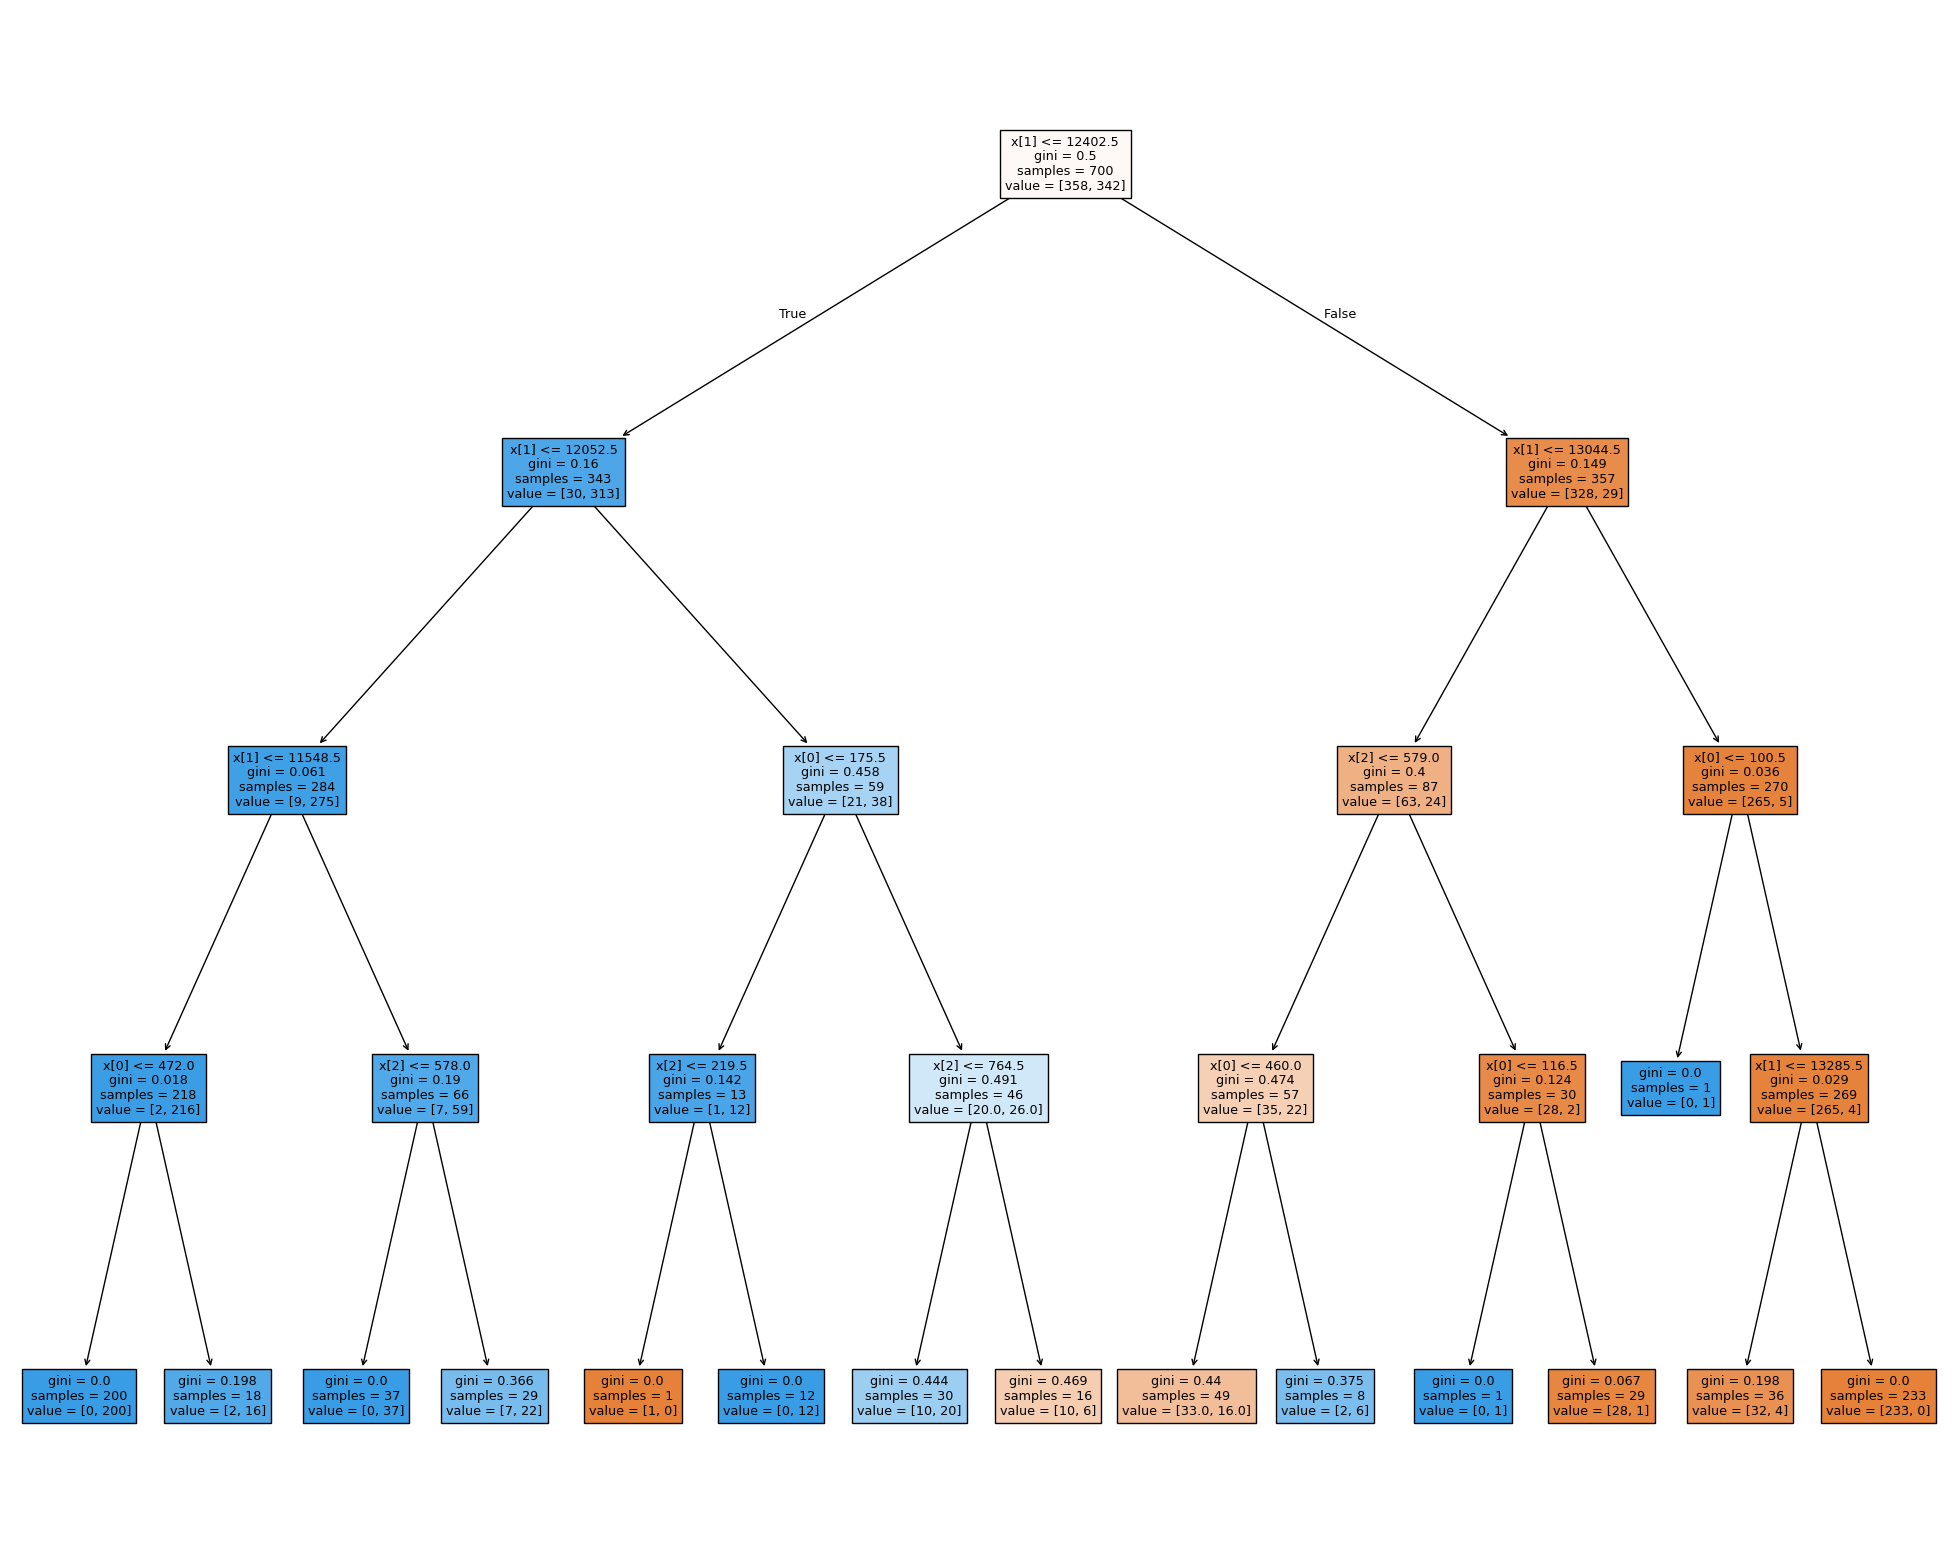

In [64]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True)

In [65]:
y_pred = model.predict(X_test)


In [66]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  87.0


In [67]:
y_train_pred = model.predict(X_train)

In [68]:
print ("Accuracy is ", accuracy_score(y_train, y_train_pred)*100)

Accuracy is  93.14285714285714


In [69]:
#Overfitting

In [70]:
#pruning

In [71]:
import joblib

In [72]:
joblib.dump(model,"loan_model.pkl")

['loan_model.pkl']